## 1. input 데이터 생성
- random paramter에 대한 regression생성
- 그에 대해 난수값의 point찍는다.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [0]:
# random regression, theta0= 3, theta1= 6
theta_0 = 3
theta_1 = 6
y = [] # 3+ 6*x => 회귀식에 해당하는 y값을 저장할 리스트
x = [ i for i in range(0,10)] #x값

for i in range(len(x)):
  y_arg = 3+ 6*x[i]
  y.append(y_arg)

Text(0.5, 1.0, 'random regression')

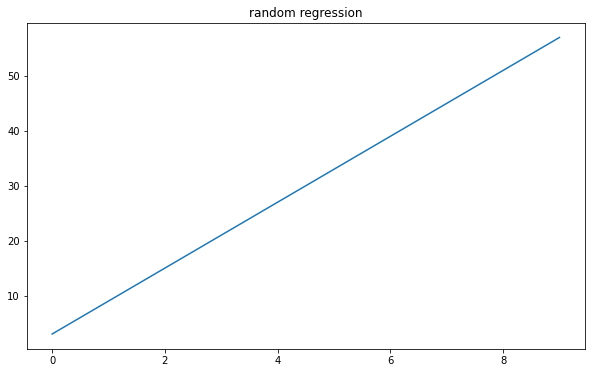

In [324]:
# 정한 회귀 직선 plotting
plt.figure(figsize=(10,6))
plt.plot(x,y)
plt.title("random regression")

In [0]:
# 정한 회귀 직선을 바탕으로 데이터 생성하기 (오차  가우시안 오차)
mu = 0 # 정규분포에 대한 오차 파라미터값
sigma = 3


x_data = [] #오차를 생성하여 구한 x값
y_data = [] #오차를 생성하여 구한 y값

for i in range(10):
  error = np.random.normal(mu,sigma)
  x_data_arg = x[i]+error
  x_data.append(x_data_arg)
  y_data_arg = y[i]+error
  y_data.append(y_data_arg)

In [327]:
print(len(y_data), len(x_data)) #리스트 갯수 확인

10 10


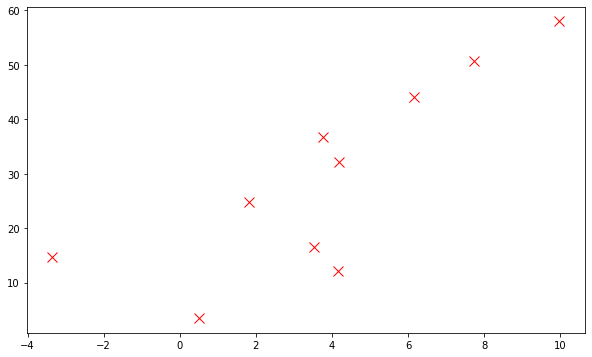

In [328]:
# plotting the data that we randomly make.
plt.figure(figsize=(10,6))
plt.plot(x_data,y_data,'rx', markersize=10)

## 2. cost function & Gradient descent
- cost에 대한 iteration을 convergence할 때까지 돌린다(Gradient Descent)
- 해당 cost값과 theta(parameters)값을 구한다. 

![image](https://user-images.githubusercontent.com/49298791/77844236-e614f400-71df-11ea-883b-16d5dac1a2ad.png)


- ***theta값을 하나의 벡터로 지정하려면 X, theta값을 변형한 형태의 array로 만들어 줘야 한다. (=> 이 방법 사용)***
- 혹은 theta0, theta1을 그대로 가져가면 복잡하긴 하지만 직관적으로 이해하긴 더 쉬울 것 같음. (어차피 행렬변환해줘야 하는 부분이므로 비효율적임, regression의 y를 표현하는 데 있어서 theta.T*x의 형태로 나타내므로 위의 방법을 사용하는 것으로 판단)

In [0]:
data = np.array([x_data,y_data]) #배열로 지정하여 값을 추가하기 위해 합친다

In [330]:
data.shape

(2, 10)

In [0]:
X=np.transpose(np.array(data[:-1]))
y=np.transpose(np.array(data[-1:]))
m=y.size

In [0]:
# X벡터값과 theta값을 받았을 때, 도출할 수 있는 linear model
def h(theta,X):
  return X.dot(theta)

In [0]:
# Objective function
def ObjectiveFunction(theta, X, y):
  return float((1./(2*m)) * np.dot((h(theta,X)-y).T,(h(theta,X)-y)))

In [0]:
# X에는 1인 열을 추가한 배열 형성, theta값은 0으로 초기화, y값은 그대로
X=np.insert(X, 0,1, axis=1)
theta = np.zeros((2,1))

In [335]:
X[:10] #10개만 확인 

array([[ 1.        ,  0.51864648],
       [ 1.        ,  4.1528634 ],
       [ 1.        ,  3.51925746],
       [ 1.        , -3.35369563],
       [ 1.        ,  1.83207797],
       [ 1.        ,  4.18637354],
       [ 1.        ,  3.77476504],
       [ 1.        ,  6.16469855],
       [ 1.        ,  7.73232552],
       [ 1.        ,  9.98166807]])

In [336]:
# ObjectiveFunction계산
print(ObjectiveFunction(theta,X,y))

576.9307212664718


In [0]:
# Gradient descent using Objective function
iteration = 1000 #임의로 정한 하이퍼파라미터값
alpha = 0.01

def descendGradient(X, theta):
    #plotting위해 저장하는 history
    J_history = [] 
    theta_history = [] 

    #iteration
    for i in range(iteration):
        tmp = theta #동시에 update하기 위해선 교환하기 위한 새로운 변수가 필요
        
        J_history.append(ObjectiveFunction(theta,X,y))
        theta_history.append(list(theta[:,0]))

        #update theta
        for j in range(len(tmp)):
            tmp[j] = theta[j] - (alpha/m)*np.sum((h(theta,X) - y)*np.array(X[:,j]).reshape(m,1))
        theta = tmp #(theta0, theta1)하나의 벡터로 저장한다. 
    return theta, theta_history, J_history

In [0]:
# Gradient descent계산
theta, theta_history, J_history = descendGradient(X,theta)

## 3. plotting cost function & fitting regression

In [351]:
theta #확인

array([[14.10887135],
       [ 3.94726102]])

In [352]:
J_history[:10] #cost값 10개만 확인 

[65.68426778552461,
 65.5351780755272,
 65.38743188922314,
 65.24101711943274,
 65.09592176808023,
 64.95213394521069,
 64.80964186801565,
 64.66843385986756,
 64.52849834936295,
 64.38982386937421]

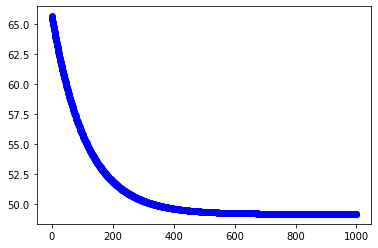

In [353]:
# cost값 plotting
plt.plot(range(len(J_history)),J_history,'bo')

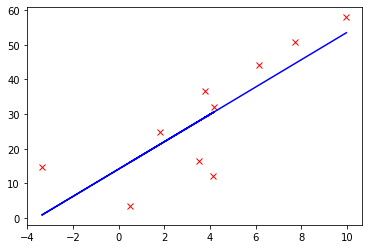

In [354]:
# fit되는 데이터 확인 
def final(x):
  return theta[0]+theta[1]*x

plt.plot(x_data, y_data, 'rx')
plt.plot(X[:,1], final(X[:,1]),'b-')

## 4. plotting parameters
- 앞에서 저장한 theta(theta0, theta1)값을 시각화 하는 부분
- converge하는 부분을 확인하면 된다(=energe값 즉 cost값도 flatten되는 값이 결국 iteration이 끝나는 최적화된 값이다 

In [355]:
theta_history[:10] #iteration돌면서 찍은 theta0, theta1값 10개만 확인 

[[5.703627545327973, 5.144248136259865],
 [5.742000499577683, 5.138783460543192],
 [5.780200163375022, 5.133343463044431],
 [5.818227319291501, 5.1279280323179135],
 [5.85608274636458, 5.122537057421255],
 [5.893767220113618, 5.117170427913081],
 [5.93128151255577, 5.111828033850766],
 [5.968626392221792, 5.106509765788179],
 [6.005802624171796, 5.1012155147734415],
 [6.042810970010917, 5.095945172346699]]

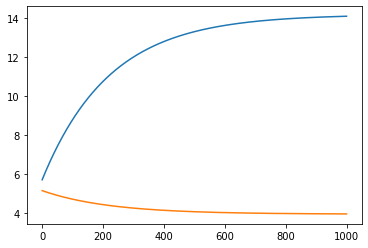

In [360]:
# plotting each parameter(theta0, theta1)
plt.plot(theta_history)